

# VEHICLE LOAN DEFAULT PREDICTION MODEL
## By Memory Mbewe

In this notebook, a loan default prediction model will be build using XGBoost classification algorithm.

The dataset will be loaded using Pandas library, the aforementioned algorithms will then be applied to it. 
Th accuracy evaluation methods such as Area Under the Curve (AUC), Jaccard index, F1-score and LogLoss will be used.

## IMPORTING NEEDED PACKAGES

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About the dataset

Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets: • Loanee Information (Demographic data like age, Identity proof etc.) • Loan Information (Disbursal details, loan to value ratio etc.) • Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.) Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates. . • train.csv contains the training data with details on loan as described in the above.

# LOAD UN-PRE-PROCESSED DATA

In [2]:
df = pd.read_csv('train.csv')
print('Dataset successfully loaded as shown below')
df.head()

Dataset successfully loaded as shown below


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


# INFORMATION ABOUT THE DATASET

In [3]:
# Shape of the Dataset
df.shape

(233154, 41)

In [4]:
# Column names
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [5]:
# Data types in each column
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [6]:
# Let’s see how many of each class is in our data set
df['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

# PRE-PROCESSING

## Convert to date time object 

In [7]:
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'])
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'])
#extract year from string format date
df['year_of_birth'] = pd.DatetimeIndex(df['Date.of.Birth']).year
df['DisbursalYear'] = pd.DatetimeIndex(df['DisbursalDate']).year
df.head()


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,year_of_birth,DisbursalYear
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1984,2018
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1985,2018
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1985,2018
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1993,2018
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1977,2018


## Convert Categorical features to numerical values

### Lets look at Employment:

In [8]:
df.groupby(['Employment.Type'])['loan_default'].value_counts(normalize=True)

Employment.Type  loan_default
Salaried         0               0.796542
                 1               0.203458
Self employed    0               0.772343
                 1               0.227657
Name: loan_default, dtype: float64

~80 % of Salaried pay there loans while 77 % of Self employed pay their loan

Lets convert Salaried to 0 and Self employed to 1:

In [9]:
df['Employment.Type'].replace(to_replace=['Salaried','Self employed'], value=[0,1],inplace=True)
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,year_of_birth,DisbursalYear
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0.0,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1984,2018
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,1.0,...,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1985,2018
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1.0,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1985,2018
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,1.0,...,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1993,2018
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,1.0,...,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1977,2018


#### How about PERFORM_CNS.SCORE.DESCRIPTION?

In [10]:
df.groupby(['PERFORM_CNS.SCORE.DESCRIPTION'])['loan_default'].value_counts(normalize=True)

PERFORM_CNS.SCORE.DESCRIPTION                            loan_default
A-Very Low Risk                                          0               0.834254
                                                         1               0.165746
B-Very Low Risk                                          0               0.868710
                                                         1               0.131290
C-Very Low Risk                                          0               0.827361
                                                         1               0.172639
D-Very Low Risk                                          0               0.850414
                                                         1               0.149586
E-Low Risk                                               0               0.828208
                                                         1               0.171792
F-Low Risk                                               0               0.813789
                            

##### Lets convert  
A-Very Low Risk, B-Very Low Risk, C-Very Low Risk, D-Very Low Risk to 0:  
E,F,G - Low Risk to 1  
H,I - Medium Risk to 2  
J,K - High Rsik to 3  
L,M Very High Risk to 4  
and the rest to -1  

In [11]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['A-Very Low Risk', 'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk'], value=[0,0,0,0],inplace=True)
df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['E-Low Risk', 'F-Low Risk', 'G-Low Risk'], value=[1,1,1],inplace=True)
df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['H-Medium Risk', 'I-Medium Risk'], value=[2,2],inplace=True)
df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['J-High Risk', 'K-High Risk'], value=[3,3],inplace=True)
df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['L-Very High Risk', 'M-Very High Risk'], value=[4,4],inplace=True)
df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['No Bureau History Available', 'Not Scored: More than 50 active Accounts found', 'Not Scored: No Activity seen on the customer (Inactive)', 'Not Scored: No Updates available in last 36 months', 'Not Scored: Not Enough Info available on the customer', 'Not Scored: Only a Guarantor', 'Not Scored: Sufficient History Not Available'], value=[-1,-1,-1,-1,-1,-1,-1],inplace=True)
df.groupby(['PERFORM_CNS.SCORE.DESCRIPTION'])['loan_default'].value_counts(normalize=True)

PERFORM_CNS.SCORE.DESCRIPTION  loan_default
-1                             0               0.770274
                               1               0.229726
 0                             0               0.841941
                               1               0.158059
 1                             0               0.816005
                               1               0.183995
 2                             0               0.744360
                               1               0.255640
 3                             0               0.729896
                               1               0.270104
 4                             0               0.698184
                               1               0.301816
Name: loan_default, dtype: float64

#### Converting AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH from #yrs #mons to int

In [12]:
df = df.assign(Average_ACCT_Age = (df['AVERAGE.ACCT.AGE'].str.extractall(r'(\d+)')[0]
  .unstack()
  .astype(int)
  .set_axis(['yr', 'mon'], axis=1, inplace=False)
  .eval('yr + mon / 12'))) 
df.head()


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,year_of_birth,DisbursalYear,Average_ACCT_Age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0.0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1984,2018,0.000000
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,1.0,...,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1985,2018,1.916667
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1.0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1985,2018,0.000000
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,1.0,...,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1993,2018,0.666667
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,1.0,...,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1977,2018,0.000000


In [13]:
df = df.assign(Credit_History_Length = (df['CREDIT.HISTORY.LENGTH'].str.extractall(r'(\d+)')[0]
  .unstack()
  .astype(int)
  .set_axis(['yr', 'mon'], axis=1, inplace=False)
  .eval('yr + mon / 12'))) 
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,year_of_birth,DisbursalYear,Average_ACCT_Age,Credit_History_Length
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0.0,...,0,0,0yrs 0mon,0yrs 0mon,0,0,1984,2018,0.000000,0.000000
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,1.0,...,0,1,1yrs 11mon,1yrs 11mon,0,1,1985,2018,1.916667,1.916667
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1.0,...,0,0,0yrs 0mon,0yrs 0mon,0,0,1985,2018,0.000000,0.000000
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,1.0,...,0,0,0yrs 8mon,1yrs 3mon,1,1,1993,2018,0.666667,1.250000
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,1.0,...,0,0,0yrs 0mon,0yrs 0mon,1,1,1977,2018,0.000000,0.000000


In [14]:
# Drop old columns 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'
df=df.drop(['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis=1)
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,year_of_birth,DisbursalYear,Average_ACCT_Age,Credit_History_Length
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0.0,...,0,0,0,0,0,0,1984,2018,0.000000,0.000000
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,1.0,...,1991,0,0,1,0,1,1985,2018,1.916667,1.916667
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1.0,...,0,0,0,0,0,0,1985,2018,0.000000,0.000000
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,1.0,...,31,0,0,0,1,1,1993,2018,0.666667,1.250000
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,1.0,...,0,0,0,0,1,1,1977,2018,0.000000,0.000000


### Calculating age at Dispursal and appending it to DataFrame


In [15]:
df['age_at_disbursal'] = abs(df["DisbursalYear"] - df["year_of_birth"])
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,year_of_birth,DisbursalYear,Average_ACCT_Age,Credit_History_Length,age_at_disbursal
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0.0,...,0,0,0,0,0,1984,2018,0.000000,0.000000,34
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,1.0,...,0,0,1,0,1,1985,2018,1.916667,1.916667,33
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1.0,...,0,0,0,0,0,1985,2018,0.000000,0.000000,33
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,1.0,...,0,0,0,1,1,1993,2018,0.666667,1.250000,25
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,1.0,...,0,0,0,1,1,1977,2018,0.000000,0.000000,41


# GENERAL DESCRIPTIVE STATISTICS

In [16]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,year_of_birth,DisbursalYear,Average_ACCT_Age,Credit_History_Length,age_at_disbursal
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,225493.000000,233154.000000,...,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,0.566026,7.262243,...,3.232684e+02,0.381833,0.097481,0.206615,0.217071,1993.769354,2018.0,0.742980,1.354367,33.435112
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,0.495622,4.482230,...,1.555369e+04,0.955107,0.384439,0.706498,0.412252,24.603385,0.0,1.258868,2.381771,8.633757
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1970.000000,2018.0,0.000000,0.000000,18.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,0.000000,4.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1981.000000,2018.0,0.000000,0.000000,26.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,1.000000,6.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1988.000000,2018.0,0.000000,0.000000,32.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,1.000000,10.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1994.000000,2018.0,1.083333,2.000000,41.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,1.000000,22.000000,...,4.170901e+06,35.000000,20.000000,36.000000,1.000000,2069.000000,2018.0,30.750000,39.000000,51.000000


## DROP Na Rows and reset index

In [17]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print('Shape:',df.shape)
df.head()

Shape: (225493, 44)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,year_of_birth,DisbursalYear,Average_ACCT_Age,Credit_History_Length,age_at_disbursal
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0.0,...,0,0,0,0,0,1984,2018,0.000000,0.000000,34
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,1.0,...,0,0,1,0,1,1985,2018,1.916667,1.916667,33
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1.0,...,0,0,0,0,0,1985,2018,0.000000,0.000000,33
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,1.0,...,0,0,0,1,1,1993,2018,0.666667,1.250000,25
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,1.0,...,0,0,0,1,1,1977,2018,0.000000,0.000000,41


# SAVE PRE-PROCESSED DATAFRAME TO CSV

In [18]:
df.to_csv('loan_train_pre_processed.csv')
print('loan_train_pre_processed successfully saved to csv')

loan_train_pre_processed successfully saved to csv


# LOAD PROCESSED DATA

In [19]:
predict = pd.read_csv("loan_train_pre_processed.csv")
print('loan_train_pre_processed csv successfully loaded')

loan_train_pre_processed csv successfully loaded


# FEATURE SELECTION

In [20]:
predictors =['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'Employment.Type',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'year_of_birth',
 'DisbursalYear',
 'Average_ACCT_Age',
 'Credit_History_Length',
 'age_at_disbursal']

# TRAIN TEST SPLIT

In [21]:
X, y = predict[predictors], predict['loan_default']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# NORMALIZE DATA
Data Standardization give data zero mean and unit variance (technically should be done after train test split )
Since we are going to use XGBoost with booster='gbtree', we do not need to Normalize out data

# FITTING THE MODEL

In [22]:
xg_cl=xgb.XGBClassifier(objective='binary:logistic',n_estimators=10,seed=123)
xg_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=10, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

# PREDICTION

In [23]:
preds=xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
preds[0:5]

array([0, 0, 0, 0, 0])

# ACCURACY AND PREDICTION PROBABILITY

In [24]:
print("Accuracy: %f" % (accuracy))
print('XGBoost roc_auc_score',roc_auc_score(y_test, xg_cl.predict_proba(X_test)[:,1]))

Accuracy: 0.785561
XGBoost roc_auc_score 0.6532260268221172


# FEATURE IMPORTANCE

[0.02466185 0.07733396 0.0115438  0.09109504 0.0332435  0.017931
 0.04620555 0.03551835 0.03450273 0.07548063 0.01407028 0.
 0.         0.         0.02624284 0.         0.         0.09927636
 0.04918713 0.02555138 0.02227792 0.03618474 0.01719281 0.05132945
 0.02383391 0.         0.         0.00766015 0.         0.
 0.         0.01725479 0.         0.02463078 0.02847051 0.03574356
 0.01323905 0.         0.01135062 0.02633164 0.02265567]


<Figure size 2880x2880 with 0 Axes>

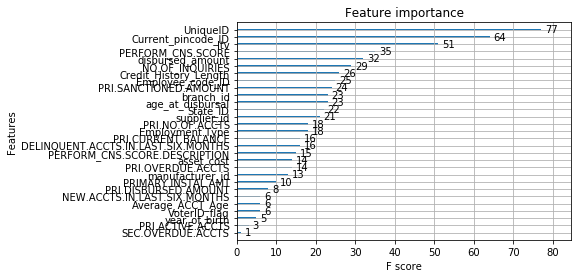

In [25]:
print(xg_cl.feature_importances_)
plt.figure(figsize=(40, 40))
xgb.plot_importance(xg_cl)
plt.show()

# PRE-PROCESSING TEST CSV

## Loading un-pre-pre-processed test csv

In [26]:
test_df = pd.read_csv('loan_test.csv')
print('Dataset successfully loaded as shown below')
test_df.head()

Dataset successfully loaded as shown below


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [27]:
# Convert to date time object
test_df['Date.of.Birth'] = pd.to_datetime(test_df['Date.of.Birth'])
test_df['DisbursalDate'] = pd.to_datetime(test_df['DisbursalDate'])
#extract year from string format date
test_df['year_of_birth'] = pd.DatetimeIndex(test_df['Date.of.Birth']).year
test_df['DisbursalYear'] = pd.DatetimeIndex(test_df['DisbursalDate']).year

# Convert Categorical features to numerical values
test_df['Employment.Type'].replace(to_replace=['Salaried','Self employed'], value=[0,1],inplace=True)

test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['A-Very Low Risk', 'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk'], value=[0,0,0,0],inplace=True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['E-Low Risk', 'F-Low Risk', 'G-Low Risk'], value=[1,1,1],inplace=True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['H-Medium Risk', 'I-Medium Risk'], value=[2,2],inplace=True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['J-High Risk', 'K-High Risk'], value=[3,3],inplace=True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['L-Very High Risk', 'M-Very High Risk'], value=[4,4],inplace=True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['No Bureau History Available', 'Not Scored: More than 50 active Accounts found', 'Not Scored: No Activity seen on the customer (Inactive)', 'Not Scored: No Updates available in last 36 months', 'Not Scored: Not Enough Info available on the customer', 'Not Scored: Only a Guarantor', 'Not Scored: Sufficient History Not Available'], value=[-1,-1,-1,-1,-1,-1,-1],inplace=True)

test_df = test_df.assign(Average_ACCT_Age = (test_df['AVERAGE.ACCT.AGE'].str.extractall(r'(\d+)')[0]
  .unstack()
  .astype(int)
  .set_axis(['yr', 'mon'], axis=1, inplace=False)
  .eval('yr + mon / 12'))) 

test_df = test_df.assign(Credit_History_Length = (test_df['CREDIT.HISTORY.LENGTH'].str.extractall(r'(\d+)')[0]
  .unstack()
  .astype(int)
  .set_axis(['yr', 'mon'], axis=1, inplace=False)
  .eval('yr + mon / 12'))) 

# Drop old columns 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'
test_df=test_df.drop(['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis=1)

# Calculating age at Dispursal and appending it to DataFrame
test_df['age_at_disbursal'] = abs(test_df["DisbursalYear"] - test_df["year_of_birth"])

# DROP Na Rows and reset index
test_df.dropna(inplace=True)
test_df.reset_index(drop=True, inplace=True)
print('Shape:',df.shape)
test_df.head()

# SAVE PRE-PROCESSED DATAFRAME TO CSV
test_df.to_csv('loan_test_pre_processed.csv')


Shape: (225493, 44)


# LOAD (PROCESSED) TEST CSV

In [28]:
#Separate test (evaluation) dataset that doesn't include the output
test_data = pd.read_csv('loan_test_pre_processed.csv')


# PREDICTION USING TEST CSV

In [29]:
#Choose the same columns you trained the model with
X = test_data[predictors] 
test_data['loan_default'] = xg_cl.predict(X)

# SAVING PREDICTION TO SUBMISSION FILE

In [30]:
test_data[['UniqueID','loan_default']].to_csv('submission_file_XGBoost.csv')
print('submission_file_XGBoost successfully saved as csv with the columns UniqueID and loan_default.')

submission_file_XGBoost successfully saved as csv with the columns UniqueID and loan_default.


# MODEL EVALUATION METRICS

## AUC AREA UNDER the CURVE

Threshold: ROC AUC=0.500
XGBoost MOdel: ROC AUC=0.653


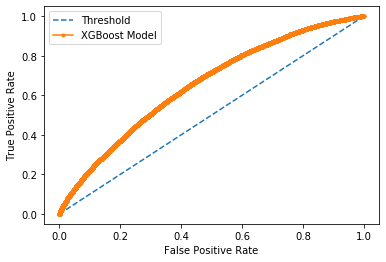

In [31]:

# predict probabilities
lr_probs = xg_cl.predict_proba(X_test)
# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Threshold: ROC AUC=%.3f' % (ns_auc))
print('XGBoost MOdel: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Threshold')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## jaccard_similarity_score, f1_score and log_loss

In [32]:
print("XGBoost LogLoss: %.2f" % log_loss(y_test,lr_probs))
print("XGBoost F1-score: %.2f" % f1_score(y_test, preds, average='weighted') )
print("XGBoost Jaccard index: %.2f" % jaccard_similarity_score(y_test, preds))

XGBoost LogLoss: 0.50
XGBoost F1-score: 0.69
XGBoost Jaccard index: 0.79
